### Learn How to find a minima of a function

In [2]:
# Import Libraries
import random, math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a quadratic funtion
def quad(x):
    return x ** 2 + 2 * x + 5

In [4]:
# Dataset generation
X = np.arange(-10, 10, 0.1)
Y = [quad(i) for i in X]

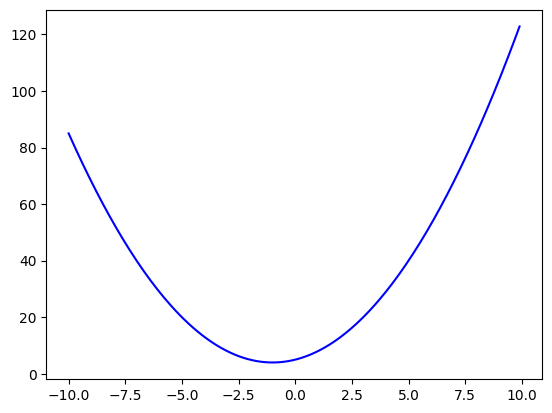

In [5]:
plt.plot(X, Y, color = 'blue')
plt.show()

In [8]:
# In a sample domain of [-10, 10), what's the min & max by brute force
min(Y), max(Y)

(np.float64(4.0), np.float64(122.80999999999842))

In [109]:
i = -5
h = 0.001

I = []
G = []

In [110]:
quad(i), quad(i + h)

(20, 19.992000999999995)

In [116]:
for _ in range(10000):
    grad = (quad(i + h) - quad(i)) / h
    i = i - h * grad
    I.append(i)
    G.append(quad(i))

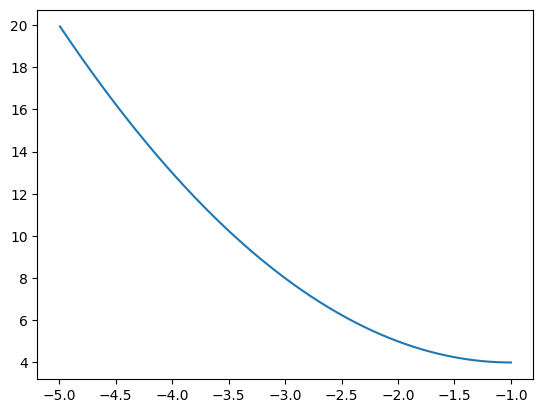

In [117]:
plt.plot(I, G)
plt.show()

In [123]:
quad(-1), quad(-1 + 0.001)

(4, 4.000001)

### Algrbric Expression Degree 2

In [203]:
def poly(x, y):
    return x ** 2 + y ** 2 + 2 * x - 5 * y + 5

In [204]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
Z = [poly(i, j) for i in X for j in Y]

In [205]:
len(Z), len(X), len(Y)

(40000, 200, 200)

In [206]:
np.ravel(X_mesh)

array([-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9])

In [207]:
X_mesh, Y_mesh = np.meshgrid(X, Y)
Z = np.array([poly(i, j) for i, j in zip(np.ravel(X_mesh), np.ravel(Y_mesh))])
X_mesh, Y_mesh = np.ravel(X_mesh), np.ravel(Y_mesh)

In [208]:
min(Z)

np.float64(-2.25)

In [243]:
np.where(Z == -2.25)

(array([25090]),)

In [237]:
X_mesh[25090], Y_mesh[25090]

(np.float64(-1.000000000000032), np.float64(2.4999999999999556))

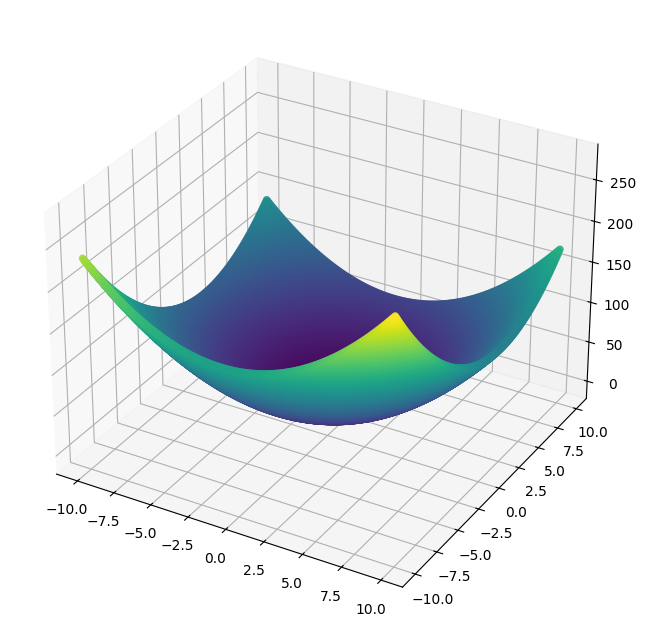

In [209]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
ax.scatter(X_mesh, Y_mesh, Z, c = Z, alpha = 0.8)
plt.show()

In [246]:
i = -5
j = -2
h = 0.001

I = []
J = []
G = []

In [247]:
poly(i, j), poly(i + h, j), poly(i, j + h), poly(i + h, j + h)

(34, 33.992000999999995, 33.991001, 33.983002)

In [252]:
for _ in range(10000):
    gradI = (poly(i + h, j) - poly(i, j)) / h
    gradJ = (poly(i, j + h) - poly(i, j)) / h
    i = i - h * gradI
    j = j - h * gradJ
    I.append(i)
    J.append(j)
    G.append(poly(i, j))

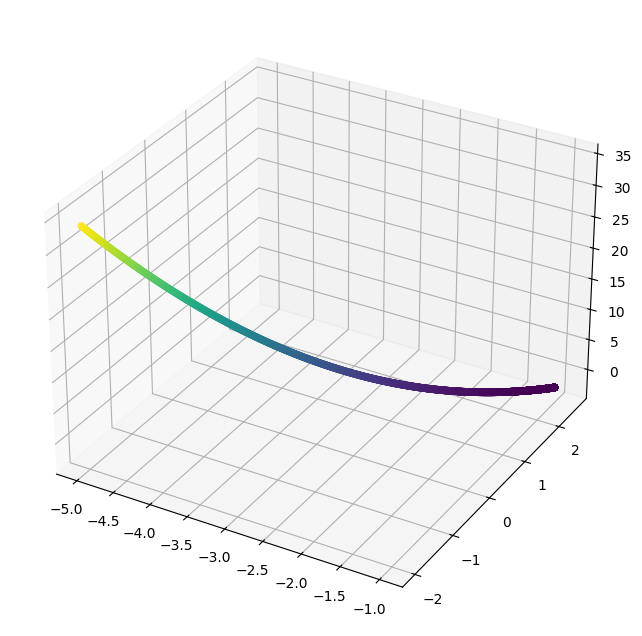

In [253]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
ax.scatter(I, J, G, c = G, alpha = 0.8)
plt.show()

### Linear Regression

In [369]:
slope = random.random()
intercept = random.random()
slope, intercept

(0.33196778673837424, 0.4985506501704031)

In [370]:
def regression(x):
    return slope * x + intercept

In [371]:
X = np.arange(0, 10, 0.1)
Y = np.arange(0, 10, 0.1)
X = [i + random.uniform(-1, 1) + 5 for i in X]

In [372]:
Y_pred = [regression(i) for i in X]

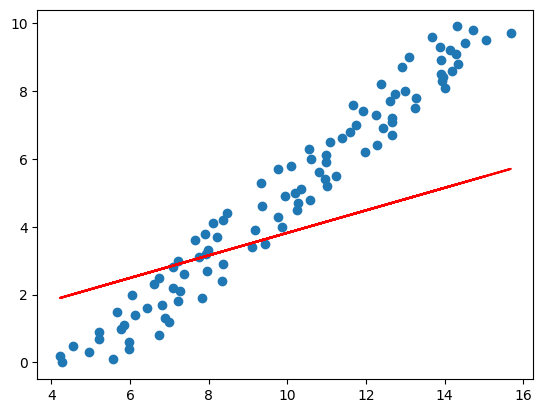

In [373]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.show()

In [374]:
h = 0.001

In [375]:
gradSlope = (sum(abs([((slope + h) * x + intercept) for x in X]  - Y)) / len(Y) - sum(abs([(slope * x + intercept) for x in X]  - Y)) / len(Y)) / h
gradSlope

np.float64(-5.7401181968996795)

In [376]:
slope = slope - h * gradSlope

In [377]:
error = sum(abs(Y_pred - Y)) / len(Y)
error

np.float64(1.8569874324974092)

In [408]:
for _ in range(10000):
    gradSlope = (sum(abs([((slope + h) * x + intercept) for x in X]  - Y)) / len(Y) - sum(abs([(slope * x + intercept) for x in X]  - Y)) / len(Y)) / h
    gradInter = (sum(abs([(slope * x + (intercept + h)) for x in X]  - Y)) / len(Y) - sum(abs([(slope * x + intercept) for x in X]  - Y)) / len(Y)) / h
    slope = slope - h * gradSlope
    intercept = intercept - h * gradInter

In [409]:
Y_pred = [regression(i) for i in X]

In [410]:
error = sum(abs(Y_pred - Y)) / len(Y)
error

np.float64(0.5065098603710997)

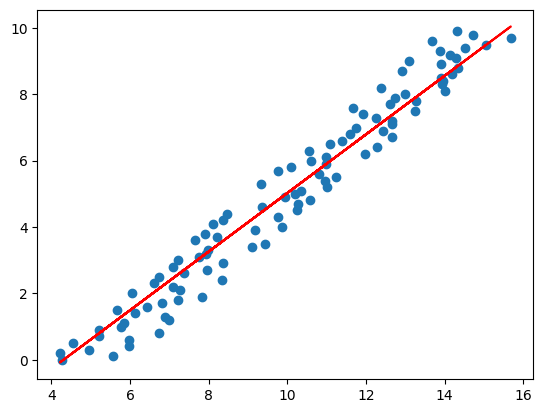

In [411]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.show()